# ODMAC++ Data Plotter

## Imports

In [70]:
import csv, os
import matplotlib.pyplot as plt

## Read data from CSV

In [71]:
FILE_NAME = "realdata_90d_40000b_const_c_eq_2,0e+00"

data_labels  = []
data_indices = []
data_values  = {}

folder_prefix = "../output/"
file_path = folder_prefix + FILE_NAME + '.csv'
with open(file_path) as csv_file:
    rows = csv.reader(csv_file, delimiter=';')
    title = True
    for row in rows:

        # initialize data labels & indices
        if title:
            c = 0
            for col_label in row:
                if not(col_label in data_values):
                    data_values[col_label] = []

                data_labels.append(col_label)
                data_indices.append(len(data_values[col_label]))
                data_values[col_label].append([])
                c += 1

            title = False
            continue

        # add new data
        c = 0
        for col_value in row:
            label = data_labels[c]
            index = data_indices[c]
            data_values[label][index].append(float(col_value))
            c += 1

## Plot Simulation Data

Energy Profile (W/m2) 0
Captor Energy (kJ) 1
Captor Throughput (pkt/s) 2


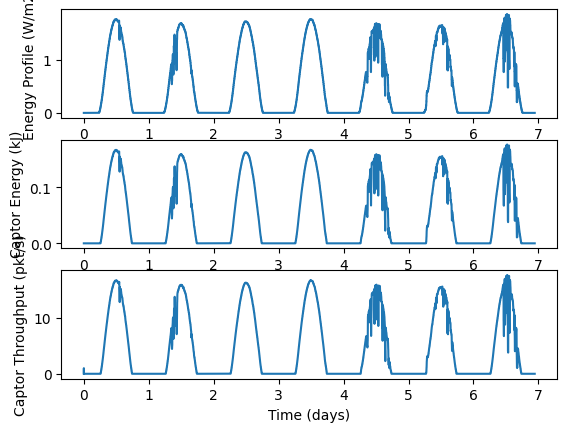

In [74]:
SHOWN             = 10000 # amount of points/time steps to plot, -1 for everything
SIZE              = 1
TIME_LABEL        = 'Time (days)'
IGNORED_VARIABLES = [TIME_LABEL, 'Frequency', 'Sink', 'Downtime'] # Ignored data
FIG_NUMBER        = 3

axc = 0
fig, axes = plt.subplots(FIG_NUMBER)

def is_ignored(key):
    for ignored in IGNORED_VARIABLES:
        if ignored in key:
            return True
    return False

T = data_values[TIME_LABEL][0][:SHOWN]
for key, lists in data_values.items():

    # Don't print ignored variables
    if is_ignored(key):
        c += 1
        continue
    
    print(key, axc % FIG_NUMBER)

    ax = axes[axc % FIG_NUMBER]

    c = 0
    for Y in lists:
        Y = Y[:SHOWN]
        ax.plot(T, Y, label=str(c + 1))
        c += 1

    ax.set_ylabel(key)
    ax.set_xlabel('Time (days)')
    if len(lists) > 1:
        ax.legend()

    axc += 1

## Throughput, Downtime w.r.t. exposure/battery capacity

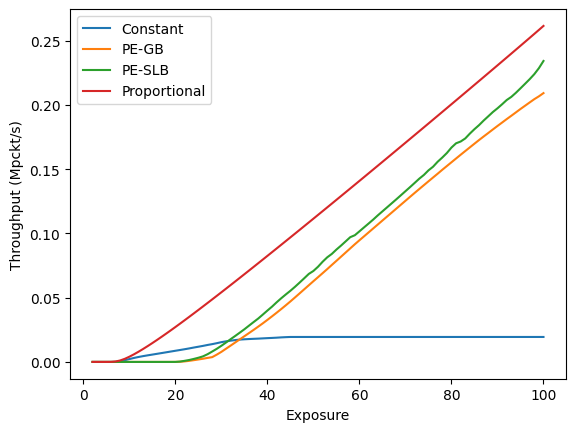

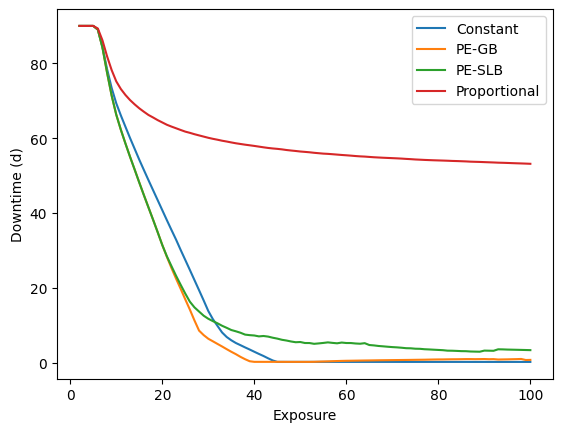

In [73]:
FILE_PREFIX = "wrt_exposure_"

exposures = []
thrghputs = []
downtimes = []
labels    = []

folder_prefix = "../output/"
for file_name in os.listdir(folder_prefix):
        if not file_name.startswith(FILE_PREFIX):
                continue

        exposure = []
        thrghput = []
        downtime = []

        file_path = folder_prefix + file_name
        with open(file_path) as csv_file:
                rows = csv.reader(csv_file, delimiter=';')
                title = True
                for row in rows:
                        if title:
                                title = False
                                continue

                        exposure.append(float(row[0]))
                        thrghput.append(float(row[1]) / 1e6)
                        downtime.append(float(row[2]) / 3.6e3 / 24)

        exposures.append(exposure)
        thrghputs.append(thrghput)
        downtimes.append(downtime)
        labels.append(file_name[len(FILE_PREFIX):-4])

def plot(xs, ys, xlabel, ylabel):
        for i in range(len(xs)):
                plt.plot(xs[i], ys[i], label=labels[i])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend()
        plt.show()

plot(exposures, thrghputs, 'Exposure', 'Throughput (Mpckt/s)')
plot(exposures, downtimes, 'Exposure', 'Downtime (d)')